<a href="https://colab.research.google.com/github/Oec8cek/Ai-Understanding/blob/main/pr_lab3_tree_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trees

Table of contents

✔ Chapter 1. Tree Ensembles

# Chapter 1-1. Use scikit-learn to implement Random Forest




In [ ]:
from sklearn.ensemble import RandomForestClassifier

Define the RandomForest model

The following is the hyper-parameters

*   n_estimators: the number of trees
*   criterion: when choosing the node (e.g., gini impurity and entropy)
*   max_depth:  the maximum depth of the tree 
*   min_samples_split: the minimum number of remaining samples for the split
*   max_features: the number of features to be considered. we learned that the typical number will be sqrt(# total features)







load the breast cancer dataset



*   Consist of the following 30 features (and compute mean, stadard error (std / sqrt(N)), and the worst case)

  a) radius (mean of distances from center to points on the perimeter)

  b) texture (standard deviation of gray-scale values)

  c) perimeter

  d) area

  e) smoothness (local variation in radius lengths)

  f) compactness (perimeter^2 / area - 1.0)

  g) concavity (severity of concave portions of the contour)

  h) concave points (number of concave portions of the contour)

  i) symmetry

  j) fractal dimension ("coastline approximation" - 1)



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
import pandas as pd

df = pd.DataFrame(X_train)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [ ]:
X.shape

(569, 30)

In [ ]:
clf = RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

Use k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(sum(scores)/len(scores))

[0.93859649 0.92982456 0.98245614 0.96491228 0.97345133]
0.9578481602235678


What if we use 100 trees in the ensemble?

In [ ]:
clf2 = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

In [ ]:
scores2 = cross_val_score(clf2, X, y, cv=5)
print(scores2)
print(sum(scores2)/len(scores2))

[0.94736842 0.92982456 0.99122807 0.97368421 0.97345133]
0.9631113181183046


What if we use 1000 trees in the ensemble?

In [ ]:
clf3 = RandomForestClassifier(n_estimators=1000, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)
scores3 = cross_val_score(clf3, X, y, cv=5)
print(scores3)
print(sum(scores3)/len(scores3))

[0.93859649 0.95614035 0.99122807 0.97368421 0.97345133]
0.9666200900481293


Compute the feature importance for each feature

In [ ]:
clf3.fit(X_train, y_train)

# feature importance is computed using the gini impurity (total decerase in node impurity averaged over all trees in the ensemble)
imp_score=clf3.feature_importances_

In [ ]:
#pick top 5 features
import numpy as np

# np.argsort returns "indices" in ascending order
# X[::-1]: reverse X
top_indices=np.argsort(imp_score)[::-1][:5]
print(top_indices)
top_feature_names=[data.feature_names[int(x)] for x in top_indices]
print(top_feature_names)

[22 27 20 23  7]
['worst perimeter', 'worst concave points', 'worst radius', 'worst area', 'mean concave points']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

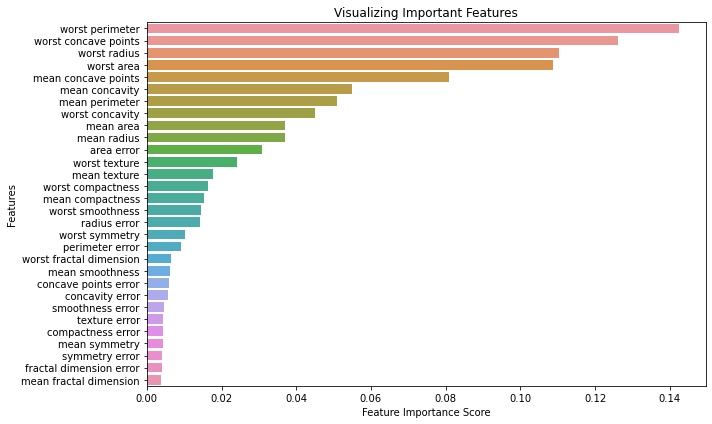

In [ ]:
feature_imp = pd.Series(clf3.feature_importances_, index=data.feature_names).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Parameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# define parameter search space
param_grid = {'n_estimators': [500,1000,2000,3000], 'criterion' :['gini', 'entropy']} ###
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fit the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..criterion=gini, n_estimators=500;, score=0.934 total time=   1.1s
[CV 2/5] END ..criterion=gini, n_estimators=500;, score=0.934 total time=   1.4s
[CV 3/5] END ..criterion=gini, n_estimators=500;, score=0.967 total time=   1.2s
[CV 4/5] END ..criterion=gini, n_estimators=500;, score=0.934 total time=   1.4s
[CV 5/5] END ..criterion=gini, n_estimators=500;, score=0.967 total time=   1.9s
[CV 1/5] END .criterion=gini, n_estimators=1000;, score=0.934 total time=   3.6s
[CV 2/5] END .criterion=gini, n_estimators=1000;, score=0.945 total time=   2.1s
[CV 3/5] END .criterion=gini, n_estimators=1000;, score=0.967 total time=   2.2s
[CV 4/5] END .criterion=gini, n_estimators=1000;, score=0.934 total time=   2.2s
[CV 5/5] END .criterion=gini, n_estimators=1000;, score=0.967 total time=   2.2s
[CV 1/5] END .criterion=gini, n_estimators=2000;, score=0.934 total time=   5.1s
[CV 2/5] END .criterion=gini, n_estimators=2000;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [500, 1000, 2000, 3000]},
             verbose=3)

In [ ]:
import numpy as np
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
# print best parameters after grid search
print(grid.best_params_)##2.5
  
# print how the best model looks after hyper-parameter tuning
print(grid.best_estimator_)

# evaluate the model with the best parameters chosen thru tuning
grid_pred = grid.predict(X_test)
print("accuracy on test dataset: {}".format(accuracy(y_test, grid_pred)))

{'criterion': 'entropy', 'n_estimators': 500}
RandomForestClassifier(criterion='entropy', n_estimators=500)
accuracy on test dataset: 0.956140350877193


# Chapter 1-2. Use scikit-learn to implement Gradient Boosting Regressor




In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Define gradient boost regression model

The following is the hyper-parameters


* n_estimators: the number of trees
*   max_depth:  the maximum depth of the tree 
*   min_samples_split: the minimum number of remaining samples for the split
*   learning_rate: how much the contribution of each tree will be 
* loss: loss function to optimize



Load the Boston housing dataset
- source: https://github.com/selva86/datasets/blob/master/BostonHousing.csv
- 설명: 보스턴 시의 주택 가격에 대한 데이터이다.
주택의 여러가진 요건들과 주택의 가격 정보가 포함되어 있다. 주택의 가격에 영향을 미치는 요소를 분석하고자 하는 목적으로 사용
- 컬럼값들:
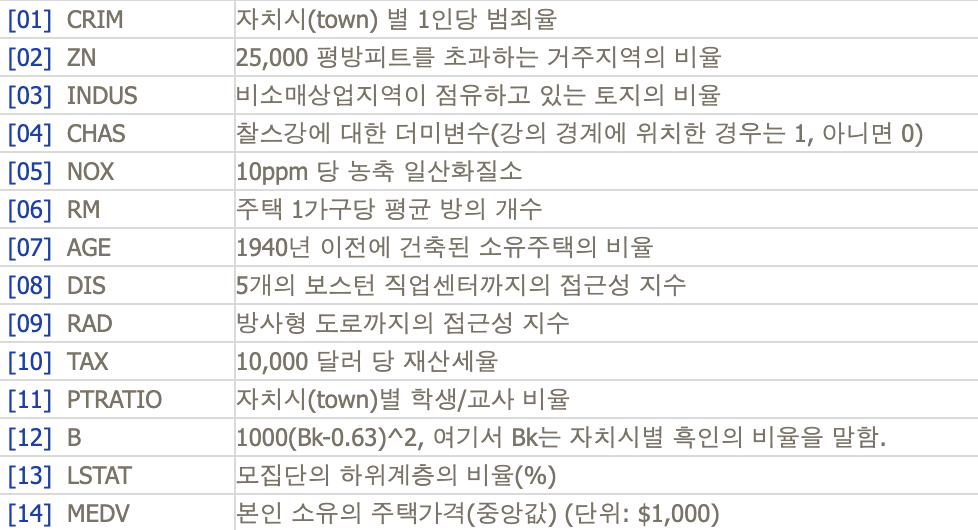

In [ ]:
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17uYcmCfDpGDrTvT-QKRlHQzlYCe2CG_Z' -O boston_housing.csv

--2023-04-26 05:24:29--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-04-26 05:24:29--  https://docs.google.com/uc?export=download&id=17uYcmCfDpGDrTvT-QKRlHQzlYCe2CG_Z
Resolving docs.google.com (docs.google.com)... 142.250.141.100, 142.250.141.102, 142.250.141.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f3l97h1qqdf22hb49f7vsitvhbkvuhnh/1682486625000/12385986347045621890/*/17uYcmCfDpGDrTvT-QKRlHQzlYCe2CG_Z?e=download&uuid=b79612e4-e510-47b5-ac6e-fc5c41098bbb [following]
--2023-04-26 05:24:30--  https://doc-0s-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f3l97h1qqdf22hb49f7vsitvhbkvuhnh/1682486625000/12385986347045621890/*/17uYcmCfDpGDrTvT-QKRlHQzlYCe2CG_Z?e=download&uuid=b79612

In [ ]:
import pandas as pd
data = pd.read_csv("boston_housing.csv")

df = pd.DataFrame(data)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(data.shape)

(506, 14)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data.iloc[: , :-1]
y = data.iloc[: , -1]
x = np.array(x)
y = np.array(y)

#Split the dataset (15% portion goes to testing set and use random seed=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.35, random_state=0) 

Fit regression model

In [ ]:
from sklearn.metrics import mean_squared_error
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 12.5736


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'MSE')

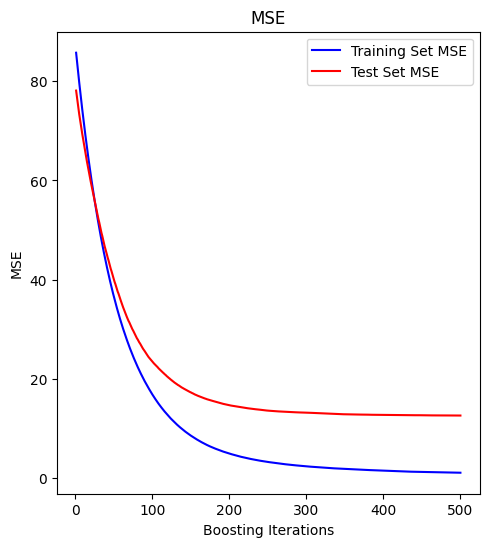

In [ ]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):# staged_predict: Predict regression target at each stage for X
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('MSE')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set MSE')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('MSE')

Compute feature importance using permutation scoring

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
#n_repeats: how many times shuffled


In [ ]:
sorted_idx = result.importances_mean.argsort()

Visualization

In [ ]:
feature_names=list(df.columns)

In [ ]:
sorted_feature_names=[feature_names[int(x)] for x in sorted_idx]
print(sorted_feature_names)

['rad', 'chas', 'zn', 'indus', 'crim', 'age', 'tax', 'b', 'nox', 'ptratio', 'dis', 'rm', 'lstat']


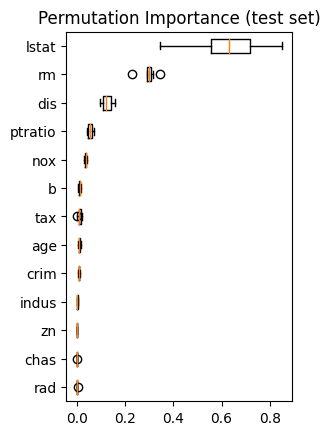

In [ ]:
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
plt.show()